# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.3,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 90 # days

In [4]:
seed = 3137

In [5]:
np.random.seed(seed)
scenario = {}

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel()
logger().model = model
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

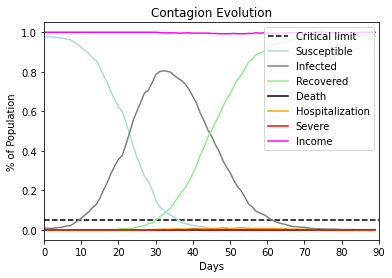

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

Save these seeds if you want to rerun a scenario
[1533, 3905, 3229, 7363, 4265, 6434, 3917, 2295, 6323, 2373, 178, 639, 7846, 1867, 7863, 250, 433, 9308, 2143, 8166, 4690, 7480, 7371, 2705, 4291, 400, 7146, 5536, 6249, 7117, 6314, 8268, 9238, 9200, 2340, 1543, 9114, 7901, 1567, 4853, 439, 5367, 8359, 3254, 2929, 7750, 7992, 2108, 5057, 2999]
run with seed 1533:
run with seed 3905:
run with seed 3229:
run with seed 7363:
run with seed 4265:
run with seed 6434:
run with seed 3917:
run with seed 2295:
run with seed 6323:
run with seed 2373:
run with seed 178:
run with seed 639:
run with seed 7846:
run with seed 1867:
run with seed 7863:
run with seed 250:
run with seed 433:
run with seed 9308:
run with seed 2143:
run with seed 8166:
run with seed 4690:
run with seed 7480:
run with seed 7371:
run with seed 2705:
run with seed 4291:
run with seed 400:
run with seed 7146:
run with seed 5536:
run with seed 6249:
run with seed 7117:
run with seed 6314:
run with seed 8268:
run with seed 9238:
r

(<function dict.items>, <function dict.items>, <function dict.items>)

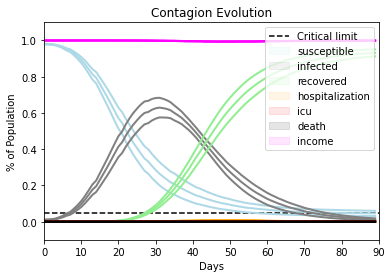

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "sceneLowHerd1", do_print = True)

## Scenario 2

Complete lockdown

In [10]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)

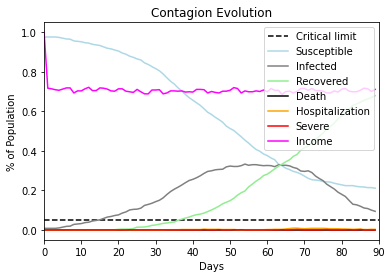

In [11]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[4773, 7276, 2388, 5763, 3978, 4636, 5869, 5444, 7796, 4643, 6303, 9877, 6044, 3466, 1456, 9805, 473, 8366, 386, 7182, 7258, 2941, 4268, 6720, 7389, 6967, 250, 5570, 8034, 3248, 5476, 4280, 5879, 2712, 6134, 6926, 9904, 1644, 1389, 9398, 4828, 6908, 6133, 2108, 6434, 4401, 9498, 2368, 9776, 5028]
run with seed 4773:
run with seed 7276:
run with seed 2388:
run with seed 5763:
run with seed 3978:
run with seed 4636:
run with seed 5869:
run with seed 5444:
run with seed 7796:
run with seed 4643:
run with seed 6303:
run with seed 9877:
run with seed 6044:
run with seed 3466:
run with seed 1456:
run with seed 9805:
run with seed 473:
run with seed 8366:
run with seed 386:
run with seed 7182:
run with seed 7258:
run with seed 2941:
run with seed 4268:
run with seed 6720:
run with seed 7389:
run with seed 6967:
run with seed 250:
run with seed 5570:
run with seed 8034:
run with seed 3248:
run with seed 5476:
run with seed 4280:
run with seed 58

(<function dict.items>, <function dict.items>, <function dict.items>)

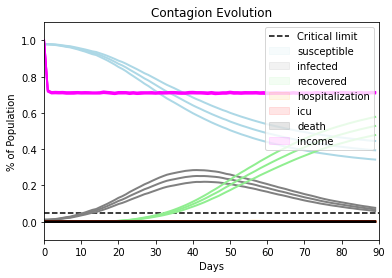

In [12]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "sceneLowHerd2", do_print = True)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [13]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

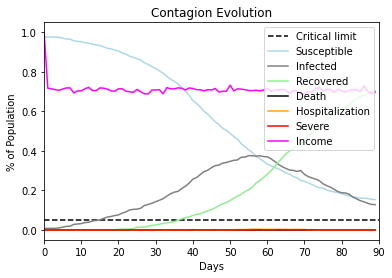

In [14]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[4466, 9629, 8223, 3834, 6452, 2000, 6425, 1037, 4362, 313, 2444, 8694, 5479, 9952, 2829, 7018, 8832, 7197, 3219, 2286, 9403, 6963, 9611, 962, 7687, 3749, 7402, 8810, 4944, 6034, 7855, 4780, 8789, 2482, 9916, 3080, 6418, 5497, 1190, 5798, 7454, 875, 1113, 4635, 6731, 5448, 2397, 5508, 8574, 217]
run with seed 4466:
run with seed 9629:
run with seed 8223:
run with seed 3834:
run with seed 6452:
run with seed 2000:
run with seed 6425:
run with seed 1037:
run with seed 4362:
run with seed 313:
run with seed 2444:
run with seed 8694:
run with seed 5479:
run with seed 9952:
run with seed 2829:
run with seed 7018:
run with seed 8832:
run with seed 7197:
run with seed 3219:
run with seed 2286:
run with seed 9403:
run with seed 6963:
run with seed 9611:
run with seed 962:
run with seed 7687:
run with seed 3749:
run with seed 7402:
run with seed 8810:
run with seed 4944:
run with seed 6034:
run with seed 7855:
run with seed 4780:
run with seed 87

(<function dict.items>, <function dict.items>, <function dict.items>)

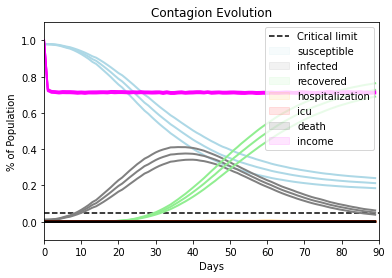

In [15]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "sceneLowHerd3", do_print = True)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [16]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

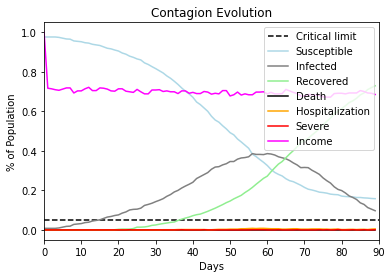

In [17]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[5574, 8640, 657, 5385, 1693, 4679, 7154, 5564, 4716, 7744, 661, 2191, 927, 7168, 5983, 2237, 2448, 2155, 654, 4395, 5403, 6526, 5177, 9063, 1175, 8552, 1627, 8020, 5264, 6029, 6038, 5337, 361, 846, 219, 2037, 5107, 8710, 6871, 214, 8919, 1862, 724, 5876, 5927, 6826, 1444, 656, 1295, 7409]
run with seed 5574:
run with seed 8640:
run with seed 657:
run with seed 5385:
run with seed 1693:
run with seed 4679:
run with seed 7154:
run with seed 5564:
run with seed 4716:
run with seed 7744:
run with seed 661:
run with seed 2191:
run with seed 927:
run with seed 7168:
run with seed 5983:
run with seed 2237:
run with seed 2448:
run with seed 2155:
run with seed 654:
run with seed 4395:
run with seed 5403:
run with seed 6526:
run with seed 5177:
run with seed 9063:
run with seed 1175:
run with seed 8552:
run with seed 1627:
run with seed 8020:
run with seed 5264:
run with seed 6029:
run with seed 6038:
run with seed 5337:
run with seed 361:
run w

(<function dict.items>, <function dict.items>, <function dict.items>)

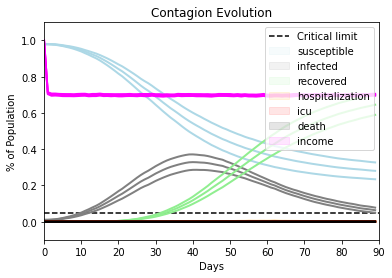

In [18]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "sceneLowHerd4", do_print = True)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [19]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

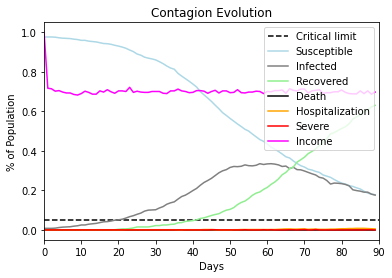

In [20]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[410, 9536, 547, 2265, 2441, 274, 6014, 4521, 8849, 9169, 5431, 3893, 6044, 2597, 9679, 8341, 1587, 9920, 5251, 9409, 1265, 3243, 4269, 2544, 1986, 4291, 5786, 5584, 5082, 2007, 1665, 9663, 9379, 1697, 7402, 6102, 8279, 3319, 1188, 7788, 4325, 957, 9542, 4458, 8701, 1167, 9243, 7504, 3098, 3905]
run with seed 410:
run with seed 9536:
run with seed 547:
run with seed 2265:
run with seed 2441:
run with seed 274:
run with seed 6014:
run with seed 4521:
run with seed 8849:
run with seed 9169:
run with seed 5431:
run with seed 3893:
run with seed 6044:
run with seed 2597:
run with seed 9679:
run with seed 8341:
run with seed 1587:
run with seed 9920:
run with seed 5251:
run with seed 9409:
run with seed 1265:
run with seed 3243:
run with seed 4269:
run with seed 2544:
run with seed 1986:
run with seed 4291:
run with seed 5786:
run with seed 5584:
run with seed 5082:
run with seed 2007:
run with seed 1665:
run with seed 9663:
run with seed 937

(<function dict.items>, <function dict.items>, <function dict.items>)

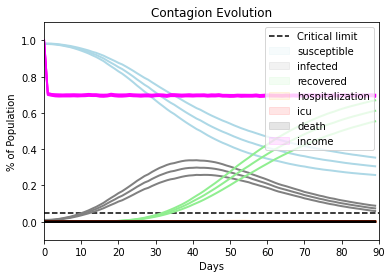

In [21]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "sceneLowHerd5", do_print = True)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [22]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

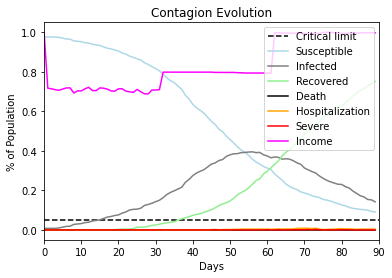

In [23]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[6221, 9123, 2893, 5680, 1306, 3537, 8481, 6701, 9767, 7643, 4443, 7976, 5848, 5459, 7932, 8734, 8631, 6015, 6528, 343, 359, 7888, 1774, 739, 3035, 2597, 9401, 9071, 3225, 3715, 9955, 6550, 4384, 8404, 8821, 8484, 2633, 4501, 2286, 595, 3044, 378, 782, 4888, 4620, 5946, 6032, 6505, 3126, 6144]
run with seed 6221:
run with seed 9123:
run with seed 2893:
run with seed 5680:
run with seed 1306:
run with seed 3537:
run with seed 8481:
run with seed 6701:
run with seed 9767:
run with seed 7643:
run with seed 4443:
run with seed 7976:
run with seed 5848:
run with seed 5459:
run with seed 7932:
run with seed 8734:
run with seed 8631:
run with seed 6015:
run with seed 6528:
run with seed 343:
run with seed 359:
run with seed 7888:
run with seed 1774:
run with seed 739:
run with seed 3035:
run with seed 2597:
run with seed 9401:
run with seed 9071:
run with seed 3225:
run with seed 3715:
run with seed 9955:
run with seed 6550:
run with seed 4384:

(<function dict.items>, <function dict.items>, <function dict.items>)

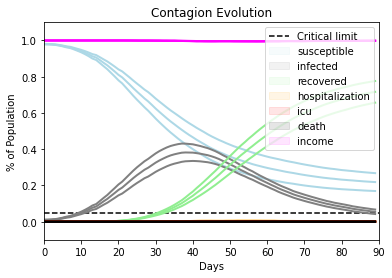

In [24]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "sceneLowHerd6", do_print = True)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [25]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

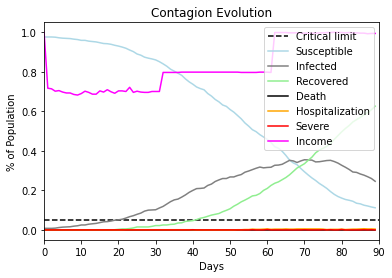

In [26]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[5384, 2618, 1048, 948, 8405, 9861, 2435, 8689, 9594, 3400, 8493, 2325, 6348, 641, 6599, 7116, 6845, 1947, 511, 8442, 8887, 4515, 577, 8165, 8999, 4322, 149, 8554, 6475, 8439, 6870, 9933, 1504, 8638, 2869, 1928, 9446, 4574, 4326, 9225, 4773, 8300, 2392, 1451, 9463, 3618, 9750, 88, 8001, 9265]
run with seed 5384:
run with seed 2618:
run with seed 1048:
run with seed 948:
run with seed 8405:
run with seed 9861:
run with seed 2435:
run with seed 8689:
run with seed 9594:
run with seed 3400:
run with seed 8493:
run with seed 2325:
run with seed 6348:
run with seed 641:
run with seed 6599:
run with seed 7116:
run with seed 6845:
run with seed 1947:
run with seed 511:
run with seed 8442:
run with seed 8887:
run with seed 4515:
run with seed 577:
run with seed 8165:
run with seed 8999:
run with seed 4322:
run with seed 149:
run with seed 8554:
run with seed 6475:
run with seed 8439:
run with seed 6870:
run with seed 9933:
run with seed 1504:
ru

(<function dict.items>, <function dict.items>, <function dict.items>)

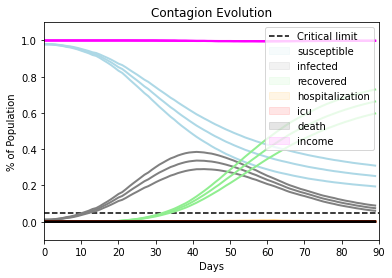

In [27]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "sceneLowHerd7", do_print = True)